In [6]:
%matplotlib inline
import sys
import numpy as np
import pylab as pl
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib
import sklearn.linear_model as sk

#read the NFL play-by-play data
nfldata = pd.read_csv("NFLplaybyplay-2015.csv")

# shuffle the data
nfldata = nfldata.reindex(np.random.permutation(nfldata.index))

# For simplicity, we will select only 500 points form the dataset.
N = 500
nfldata_sm = nfldata.sample(N)
print(nfldata_sm[1:5])


           GameId  GameDate  Quarter  Minute  Second OffenseTeam DefenseTeam  \
42748  2015112200  11/22/15        4      10      18         CHI         DEN   
27523  2015110500   11/5/15        3       9       2         CIN         CLE   
6035   2016010304    1/3/16        4       5      48         HOU         JAC   
43672  2015120603   12/6/15        4       1      12         CIN         CLE   

       Down  ToGo  YardLine      ...       IsTwoPointConversion  \
42748     2     4        96      ...                          0   
27523     1    10        51      ...                          0   
6035      2     7        54      ...                          0   
43672     4     2        71      ...                          0   

       IsTwoPointConversionSuccessful  RushDirection  YardLineFixed  \
42748                               0            NaN              4   
27523                               0   RIGHT TACKLE             49   
6035                                0         CENT

In [58]:
def polynomial_basis (x, degree):
    p = np.arange (1, degree + 1)
    return x[:, np.newaxis] ** p

# Create data frame of predictors
X1 = nfldata[["YardLine"]]
X2 = nfldata[["IsPass"]]

# Create logistic regression object
logitm1 = sk.LogisticRegression(C = 1000000)
logitm1.fit (X1, nfldata["IsTouchdown"])

# The coefficients
print('Estimated beta1: \n', logitm1.coef_)
print('Estimated beta0: \n', logitm1.intercept_)

logitm1.fit (X2, nfldata["IsTouchdown"])
print('Estimated beta1: \n', logitm1.coef_)
print('Estimated beta0: \n', logitm1.intercept_)


Estimated beta1: 
 [[ 0.06258754]]
Estimated beta0: 
 [-7.42547808]
Estimated beta1: 
 [[ 1.10625354]]
Estimated beta0: 
 [-4.06118557]


## Multiple Logistic Regression

Just like in linear regression, the logistic regression model can be extended to incorporate multiple predictors/features.  The logistic model (written in the log-odds format) can then be written as:
$$ \ln\left(\frac{P(Y=1)}{1-P(Y=1)}\right) = \beta_0+\beta_1 X_1+\dots+\beta_p X_p .$$
Maximum likelihood methods can still be used to generate estimates for the $p+1$ parameters: $\beta_0,\beta_1,\dots,\beta_p $.

In [59]:
def polynomial_basis (x, degree):
    p = np.arange (1, degree + 1)
    return x[:, np.newaxis] ** p

# Create data frame of predictors
X = nfldata[["YardLine","IsPass"]]
#print(X[0:5])

# Create logistic regression object
logitm = sk.LogisticRegression(C = 1000000)
logitm.fit (X, nfldata["IsTouchdown"])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

Estimated beta1: 
 [[ 0.06547811  1.2066147 ]]
Estimated beta0: 
 [-8.30059191]


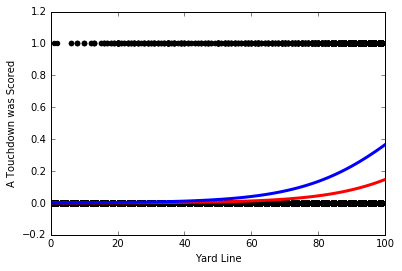

In [49]:
x = np.linspace(0, 100, 100)
x = polynomial_basis (x, 1)
x0 = np.insert(x,1,0,axis=1)
x1 = np.insert(x,1,1,axis=1)

# Plot outputs
plt.scatter(nfldata["YardLine"],nfldata["IsTouchdown"],  color='black')
plt.plot(x, logitm.predict_proba(x0)[:,1],  color='red' , lw=3)
plt.plot(x, logitm.predict_proba(x1)[:,1],  color='blue' , lw=3)
plt.xlabel ("Yard Line")
plt.ylabel("A Touchdown was Scored")
plt.xlim(0,100)
plt.show()


In [50]:
# Create data frame of predictors
nfldata['Interaction'] = nfldata["YardLine"]*nfldata["IsPass"]
X = nfldata[["YardLine","IsPass","Interaction"]]
print(X[0:5])

# Create logistic regression object
logitm = sk.LogisticRegression(C = 100000000000000000)
logitm.fit (X, nfldata["IsTouchdown"])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)

nfldata['Intercept'] = 1.0
logit_sm = sm.Logit(nfldata['IsTouchdown'], nfldata[["Intercept","YardLine","IsPass","Interaction"]])
fit_sm = logit_sm.fit()
print(fit_sm.summary())

       YardLine  IsPass  Interaction
24918        35       0            0
26375        26       0            0
17855        85       0            0
28974        26       1           26
18408        44       0            0
Estimated beta1: 
 [[ 0.06769992  1.46499966 -0.00319916]]
Estimated beta0: 
 [-8.48339234]
Optimization terminated successfully.
         Current function value: 0.102461
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:            IsTouchdown   No. Observations:                46277
Model:                          Logit   Df Residuals:                    46273
Method:                           MLE   Df Model:                            3
Date:                Wed, 19 Oct 2016   Pseudo R-squ.:                  0.2503
Time:                        09:15:04   Log-Likelihood:                -4741.6
converged:                       True   LL-Null:                       -6324.5
                              

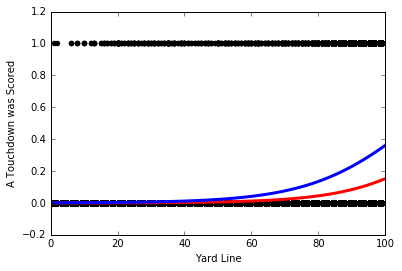

In [51]:
x = np.linspace(0, 100, 100)
x = polynomial_basis (x, 1)
x0 = np.insert(x,1,0,axis=1)
x0 = np.insert(x0,1,0,axis=1)
x1 = np.insert(x,1,1,axis=1)
x1 = np.insert(x1,2,x.flatten(),axis=1)

# Plot outputs
plt.scatter(nfldata["YardLine"],nfldata["IsTouchdown"],  color='black')
plt.plot(x, logitm.predict_proba(x0)[:,1],  color='red' , lw=3)
plt.plot(x, logitm.predict_proba(x1)[:,1],  color='blue' , lw=3)
plt.xlabel ("Yard Line")
plt.ylabel("A Touchdown was Scored")
plt.xlim(0,100)
plt.show()


## Regularization in Logistic Regression

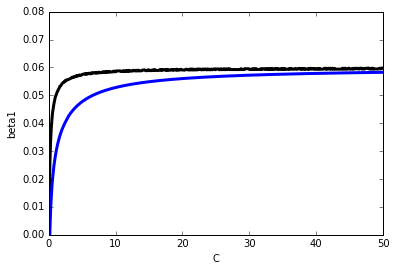

In [57]:
beta1_l1 = []
beta1_l2 = []
Cs = []
X = polynomial_basis (nfldata_sm["YardLine"], 1)

for i in range(1, 500):
    C = i/10
    logitm_l1 = sk.LogisticRegression(C = C, penalty = "l1")
    logitm_l1.fit (X, nfldata_sm["IsTouchdown"])
    logitm_l2 = sk.LogisticRegression(C = C, penalty = "l2")
    logitm_l2.fit (X, nfldata_sm["IsTouchdown"])
    beta1_l1.append(logitm_l1.coef_[0])
    beta1_l2.append(logitm_l2.coef_[0])
    Cs.append(C)

plt.plot(Cs, beta1_l1,  color='black', lw=3)
plt.plot(Cs, beta1_l2,  color='blue', lw=3)
plt.xlabel ("C")
plt.ylabel("beta1")
plt.ylim(0,0.08)
plt.show()


## Logistic Regression for $Y$ with more than 2 Categories

There are several extensions to standard logistic regression when the response variable $Y$ has more than 2 categories.  The two most common are ordinal logistic regression and multinomial logistic regression.  Ordinal logistic regression is used when the categories have a specific hierarchy (like class year: Freshman, Sophomore, Junior, Senior; or a 7-point rating scale from strongly disagree to strongly agree).  Multinomial logistic regression is used when the categories have no inherent order (like eye color: blue, green, brown, hazel, et...).

In [62]:

X = polynomial_basis (nfldata["YardLine"], 1)

nfldata["PlayType"]=nfldata["IsPass"]+2*nfldata["IsRush"]

logitm = sk.LogisticRegression(C = 10000000)
logitm.fit (X, nfldata["PlayType"])

# The coefficients
print('Estimated beta1: \n', logitm.coef_)
print('Estimated beta0: \n', logitm.intercept_)


Estimated beta1: 
 [[-0.01460736]
 [ 0.00635893]
 [ 0.00652455]]
Estimated beta0: 
 [-0.26422696 -0.61186328 -1.20051275]
